In [21]:
# Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import sys
sys.path.insert(0,'../')  # add previous directory to path to load constants module
import constants as const

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
print(tf.__version__)

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import statistics


2.12.0


In [22]:
# Import dataset using pandas

raw_dataset = pd.read_csv('../Datasets/dataset_reduced.csv')
dataset = raw_dataset.copy()
print("Shape of dataset: "+str(dataset.shape))
dataset.tail()

Shape of dataset: (602649, 17)


,turbine,theta,hub_temperature,nacelle_angle,nacelle_temperature,V1,V2,V,Wind_angle,Vane_angle,Out_temperature,W,Rotor_temperature,Wind_angle_c,nacelle_angle_c,T,P
602644,R80736,16.480000,19.290001,-132.56,15.730000,20.680000,19.170000,19.920000,-137.95,-5.37,7.27,1.801180,29.480000,-137.95,-137.95,10823.5,2043069.9
602645,R80736,16.740000,19.059999,-132.56,15.600000,20.799999,19.299999,20.049999,-138.02,-5.44,7.23,1.798038,29.379999,-138.02,-138.02,10843.5,2043060.1
602646,R80736,17.370001,17.000000,-158.05,16.389999,21.010000,19.920000,20.469999,-156.45,1.60,8.87,1.801180,32.730000,-156.45,-156.45,10853.3,2048070.1
602647,R80711,16.820000,16.000000,-117.44,15.170000,21.120001,19.840000,20.480000,-122.41,-4.99,9.31,1.801180,26.010000,-122.41,-122.41,10817.3,2041980.0
602648,R80736,17.610001,17.000000,-134.75,16.709999,21.280001,19.719999,20.500000,-140.38,-5.62,10.31,1.799085,27.200001,-140.38,-140.38,10837.3,2043120.0


In [23]:
# Clean dataset of NaN values
#dataset.isna().sum()
print(dataset.isna().sum())
dataset = dataset.dropna()

turbine                0
theta                  0
hub_temperature        0
nacelle_angle          0
nacelle_temperature    0
V1                     0
V2                     0
V                      0
Wind_angle             0
Vane_angle             0
Out_temperature        0
W                      0
Rotor_temperature      0
Wind_angle_c           0
nacelle_angle_c        0
T                      0
P                      0
dtype: int64


In [24]:
# One-hot encode categorical columns

dataset['turbine'] = dataset['turbine'].map({1:'R80711', 2:'R80721',3:'R80736', 4:'R80790'})
dataset = pd.get_dummies(dataset, columns=['turbine'], prefix='', prefix_sep='')
dataset.tail()

,theta,hub_temperature,nacelle_angle,nacelle_temperature,V1,V2,V,Wind_angle,Vane_angle,Out_temperature,W,Rotor_temperature,Wind_angle_c,nacelle_angle_c,T,P
602644,16.480000,19.290001,-132.56,15.730000,20.680000,19.170000,19.920000,-137.95,-5.37,7.27,1.801180,29.480000,-137.95,-137.95,10823.5,2043069.9
602645,16.740000,19.059999,-132.56,15.600000,20.799999,19.299999,20.049999,-138.02,-5.44,7.23,1.798038,29.379999,-138.02,-138.02,10843.5,2043060.1
602646,17.370001,17.000000,-158.05,16.389999,21.010000,19.920000,20.469999,-156.45,1.60,8.87,1.801180,32.730000,-156.45,-156.45,10853.3,2048070.1
602647,16.820000,16.000000,-117.44,15.170000,21.120001,19.840000,20.480000,-122.41,-4.99,9.31,1.801180,26.010000,-122.41,-122.41,10817.3,2041980.0
602648,17.610001,17.000000,-134.75,16.709999,21.280001,19.719999,20.500000,-140.38,-5.62,10.31,1.799085,27.200001,-140.38,-140.38,10837.3,2043120.0


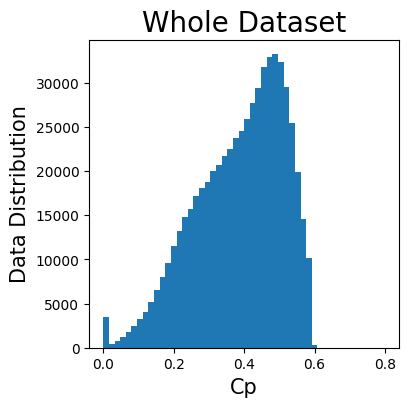

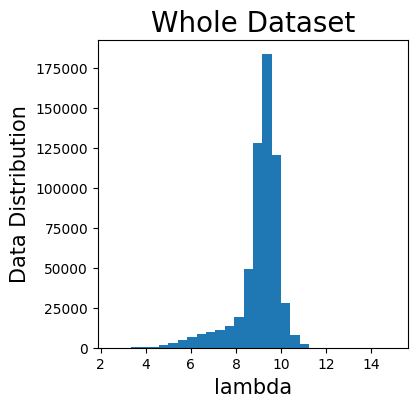

,theta,hub_temperature,nacelle_angle,nacelle_temperature,V1,V2,V,Wind_angle,Vane_angle,Out_temperature,W,Rotor_temperature,Wind_angle_c,nacelle_angle_c,T,P,Cp,lambda
602644,16.480000,19.290001,-132.56,15.730000,20.680000,19.170000,19.920000,-137.95,-5.37,7.27,1.801180,29.480000,-137.95,-137.95,10823.5,2043069.9,0.079908,3.707248
602645,16.740000,19.059999,-132.56,15.600000,20.799999,19.299999,20.049999,-138.02,-5.44,7.23,1.798038,29.379999,-138.02,-138.02,10843.5,2043060.1,0.078364,3.676787
602646,17.370001,17.000000,-158.05,16.389999,21.010000,19.920000,20.469999,-156.45,1.60,8.87,1.801180,32.730000,-156.45,-156.45,10853.3,2048070.1,0.073819,3.607639
602647,16.820000,16.000000,-117.44,15.170000,21.120001,19.840000,20.480000,-122.41,-4.99,9.31,1.801180,26.010000,-122.41,-122.41,10817.3,2041980.0,0.073492,3.605878
602648,17.610001,17.000000,-134.75,16.709999,21.280001,19.719999,20.500000,-140.38,-5.62,10.31,1.799085,27.200001,-140.38,-140.38,10837.3,2043120.0,0.073318,3.598171


In [25]:
# Add Cp and lambda to the dataset

def Cp_fromP(Pturbina, Vw):

    Cp = Pturbina / (0.5 * const.rho * const.A * Vw**3)

    return Cp

def lambd(Vw, Wwt):

    lambd = Wwt * const.R / Vw

    return lambd

Cp_data = Cp_fromP(dataset['P'][:],dataset['V'][:])
dataset['Cp'] = Cp_data
lambd_data = lambd(dataset['V'][:], dataset['W'][:])
dataset['lambda'] = lambd_data

plt.figure(figsize=(4,4))
plt.hist(Cp_data, range=[0.0, 0.8], bins=50)
plt.xlabel('Cp',fontsize=15)
plt.ylabel('Data Distribution',fontsize=15)
plt.title('Whole Dataset',fontsize=20)
plt.show()

# Histogram of lambda
plt.figure(figsize=(4,4))
plt.hist(lambd_data, range=[2.5, 15], bins=30)
plt.xlabel('lambda',fontsize=15)
plt.ylabel('Data Distribution',fontsize=15)
plt.title('Whole Dataset',fontsize=20)
plt.show()

dataset.tail()

In [26]:
# Check overal statistis of each input feature 
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
theta,602649.0,-0.081045,5.978549,-1.08,-1.000000,-0.990000,-0.900000,9.276000e+01
hub_temperature,602649.0,19.060174,5.838598,4.05,14.170000,18.719999,23.000000,3.900000e+01
nacelle_angle,602649.0,-28.785794,111.742447,-180.00,-130.160000,-59.269990,55.330002,1.799900e+02
nacelle_temperature,602649.0,24.595032,6.192875,1.49,20.639999,25.110001,28.969999,4.291000e+01
V1,602649.0,6.306669,2.018830,0.00,4.950000,5.870000,7.130000,2.128000e+01
V2,602649.0,6.321526,1.956744,0.00,4.990000,5.900000,7.140000,2.015000e+01
V,602649.0,6.314169,1.982688,0.23,4.970000,5.890000,7.130000,2.050000e+01
Wind_angle,602649.0,-28.404289,112.121101,-180.00,-130.640000,-57.989990,56.000000,1.799900e+02
Vane_angle,602649.0,-0.184985,9.427393,-179.34,-5.310000,-0.460000,4.800000,1.797500e+02
Out_temperature,602649.0,11.473260,7.091906,-6.95,5.960000,10.910000,16.330000,3.828000e+01


In [27]:
# Normalization 
# Cp in the range [0,1]. Originally, it was in [0,Cp_max]
# Rest of the variables with mean 0 and std 1

print(dataset.describe().transpose()[['mean', 'std']])

x_mean = np.nanmean( dataset, axis=0)
x_std = np.nanstd( dataset, axis=0 )

column_name = dataset.columns.values
Cp_column = column_name[5]
#print(Cp_column)

Cp_max = 0.5926
dataset_norm = dataset.copy()
icol = 0
for col in column_name:
    if(col!='Cp'): # mean 0 and std 1
        dataset_norm[col]=(dataset[col]-x_mean[icol])/x_std[icol]        
    else: # Cp in [0,1]
        dataset_norm[col]=dataset[col]/Cp_max
    icol = icol+1

print()
print("Normalized dataset")
print(dataset_norm.describe().transpose()[['mean', 'std']])

                              mean            std
theta                    -0.081045       5.978549
hub_temperature          19.060174       5.838598
nacelle_angle           -28.785794     111.742447
nacelle_temperature      24.595032       6.192875
V1                        6.306669       2.018830
V2                        6.321526       1.956744
V                         6.314169       1.982688
Wind_angle              -28.404289     112.121101
Vane_angle               -0.184985       9.427393
Out_temperature          11.473260       7.091906
W                         1.362470       0.318853
Rotor_temperature        28.486577       4.714501
Wind_angle_c            -29.302312     111.841797
nacelle_angle_c         -29.710568     111.627225
T                      2646.532389    2258.267705
P                    444860.879260  446349.165241
Cp                        0.386876       0.124435
lambda                    9.004813       1.167138

Normalized dataset
                             m

In [ ]:
""" # load existing Cp model
Cp_model = tf.keras.models.load_model('../Models/Cp3D_sigmoid_model.h5')
Cp_model.summary() """

In [28]:
# Split the data into training and test sets
train_dataset = dataset_norm.sample(frac=0.8, random_state=10)
test_dataset = dataset_norm.drop(train_dataset.index)

In [29]:
# Split input features from labels/targets

#train_features = train_dataset[['V','theta','W']]
#test_features = test_dataset[['V','theta','W']]

column_list = list(dataset.columns)
print(column_list)
column_list.remove('T')
column_list.remove('Cp')
column_list.remove('lambda')
column_list.remove('hub_temperature')
column_list.remove('nacelle_angle')
column_list.remove('V1')
column_list.remove('V2')
column_list.remove('Wind_angle')
column_list.remove('nacelle_angle_c')
column_list.remove('P')

print(column_list)

train_features = train_dataset[column_list[:]]
test_features = test_dataset[column_list[:]]
train_labels = train_dataset.pop('P')
test_labels = test_dataset.pop('P')

print(train_features.shape)
print(train_labels.shape)
n_inputs = len(column_list)
print('n_inputs: ',n_inputs)

['theta', 'hub_temperature', 'nacelle_angle', 'nacelle_temperature', 'V1', 'V2', 'V', 'Wind_angle', 'Vane_angle', 'Out_temperature', 'W', 'Rotor_temperature', 'Wind_angle_c', 'nacelle_angle_c', 'T', 'P', 'Cp', 'lambda']
['theta', 'nacelle_temperature', 'V', 'Vane_angle', 'Out_temperature', 'W', 'Rotor_temperature', 'Wind_angle_c']
(482119, 8)
(482119,)
n_inputs:  8


In [30]:
# Define the hypermodel to optimize hyperparameters
 
def model_builder(hp):
  
  input = tf.keras.Input(shape=(n_inputs,))
  model = keras.Sequential()

  # Tune the number of units in the Dense layers
  # Choose an optimal value between 8-128
  hp_units = hp.Int('units', min_value=8, max_value=256, step=2, sampling='log')
  
  # Tune the number of layers between 1-4
  #hp_layers = hp.Int('layers', min_value=1, max_value=4, step=1)
  #hp_layers = hp.Int('layers', min_value=1, max_value=4, step=1, sampling='linear')
  hp_layers = hp.Int('layers', min_value=1, max_value=4, step=2, sampling='log')

  # Tune activation function between relu, tanh and sigmoid
  #hp_activation = hp.Choice('activation', values=['relu','tanh','sigmoid'])
  hp_activation = hp.Choice('activation', values=['relu','tanh'])

  # Define architecture
  model.add(input)
  for i in range(hp_layers):
    #model.add(keras.layers.Dense(units=hp_units, activation='tanh'))
    model.add(keras.layers.Dense(units=hp_units, activation=hp_activation))
  # final linear 1-unit layer
  #model.add(keras.layers.Dense(1,activation=hp_activation)) 
  model.add(keras.layers.Dense(1)) 

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  # Tune the batch size
  #hp_batch = hp.Int('batch', min_value=32, max_value=256, step=2, sampling='log')

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                #loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                #metrics=['accuracy'])
                loss='mean_absolute_error')   

  return model

In [31]:
# Instantiate the tuner and perform hypertuning

tuner = kt.Hyperband(model_builder,
                     #objective='val_accuracy',
                     objective='val_loss',
                     #max_epochs=10,
                     max_epochs=20,
                     factor=3,
                     #factor=2,
                     directory='./Hypertuning',
                     project_name='P_NN_CF')

2025-01-22 11:05:02.173141: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [32]:
# Create a callback to stop training early after reaching a certain value for the validation loss.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

x = train_features  # input features are lambda and theta

# if batch_size is not specified, 32 is the default value
batch_size = 128
tuner.search(x, train_labels, epochs=20, validation_split=0.2, batch_size=batch_size, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete! The optimal number of layers, number of units, 
learning rate and activation function are:
n_layers: {best_hps.get('layers')}
n_units: {best_hps.get('units')}
learning_rate: {best_hps.get('learning_rate')}
activation_function: {best_hps.get('activation')}
""")

Trial 30 Complete [00h 00m 45s]
val_loss: 0.02950409986078739

Best val_loss So Far: 0.029301024973392487
Total elapsed time: 00h 11m 19s

The hyperparameter search is complete! The optimal number of layers, number of units, 
learning rate and activation function are:
n_layers: 2
n_units: 64
learning_rate: 0.001
activation_function: relu



In [33]:
# Train the model with optimal hyperparameters

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, min_lr=1e-6)
# Create a callback to stop training early after reaching a constant value for the validation loss.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

# Build the model with the optimal hyperparameters and train it on the data for 500 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(x, train_labels, epochs=200, batch_size=batch_size, 
                    validation_split=0.2, callbacks=[reduce_lr,stop_early])

Epoch 1/200
3014/3014 [==============================] - 2s 642us/step - loss: 0.0452 - val_loss: 0.0378 - lr: 0.0010
Epoch 2/200
3014/3014 [==============================] - 2s 629us/step - loss: 0.0344 - val_loss: 0.0355 - lr: 0.0010
Epoch 3/200
3014/3014 [==============================] - 2s 626us/step - loss: 0.0330 - val_loss: 0.0338 - lr: 0.0010
Epoch 4/200
3014/3014 [==============================] - 2s 630us/step - loss: 0.0322 - val_loss: 0.0327 - lr: 0.0010
Epoch 5/200
3014/3014 [==============================] - 2s 614us/step - loss: 0.0317 - val_loss: 0.0329 - lr: 0.0010
Epoch 6/200
3014/3014 [==============================] - 2s 623us/step - loss: 0.0313 - val_loss: 0.0310 - lr: 0.0010
Epoch 7/200
3014/3014 [==============================] - 2s 619us/step - loss: 0.0311 - val_loss: 0.0308 - lr: 0.0010
Epoch 8/200
3014/3014 [==============================] - 2s 670us/step - loss: 0.0307 - val_loss: 0.0311 - lr: 0.0010
Epoch 9/200
3014/3014 [==============================] -

Best epoch: 169


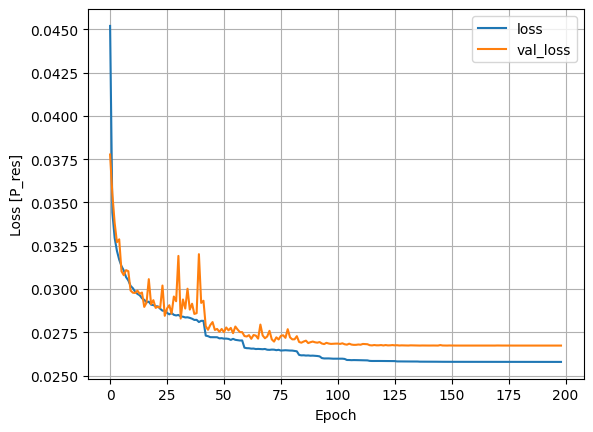

In [34]:
# Plot the loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Loss [P_res]')
plt.legend()
plt.grid(True)

val_loss_per_epoch = history.history['val_loss']
train_loss_per_epoch = history.history['loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

In [35]:
model.save('../Models/P_NN_CF.h5')

3767/3767 [==============================] - 2s 540us/step


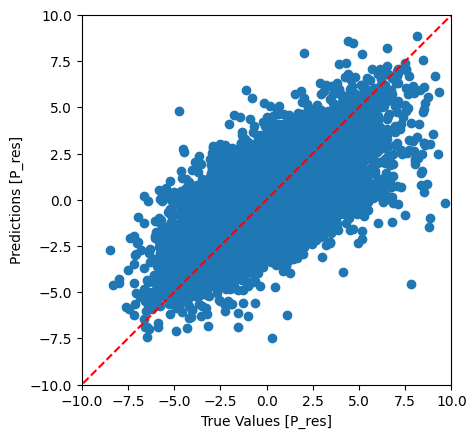

Test MAE: 0.3514438569545746


In [32]:
# Evaluate the model on P_res data

# Pred vs True values

#test_pred = model.predict(test_features[['lambda', 'theta']]).flatten()
#test_pred = model.predict(test_features[['V','theta','W']]).flatten()
test_pred = model.predict(test_features[column_list[:]]).flatten()

a = plt.axes(aspect='equal')
p1 = max(max(test_pred), max(test_labels))
p2 = min(min(test_pred), min(test_labels))
plt.plot([p1, p2], [p1, p2], 'r--')
plt.scatter(test_labels, test_pred)
plt.xlabel('True Values [P_res]')
plt.ylabel('Predictions [P_res]')
lims = [-10, 10]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)
plt.show()

#test_result = model.evaluate(test_features[['lambda','theta']], test_labels, verbose=0)
#test_result = model.evaluate(test_features[['V','theta','W']], test_labels, verbose=0)
test_result = model.evaluate(test_features[column_list[:]], test_labels, verbose=0)
print("Test MAE: "+str(test_result))

3767/3767 [==============================] - 2s 556us/step


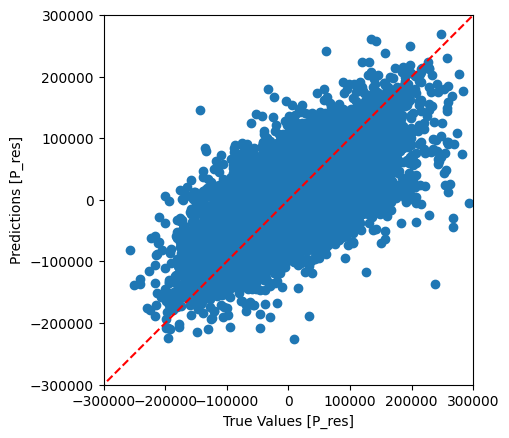


Test MAE: 10640.056085331578
Test RMSE: 22210.333383900685
Test MAPE: 61.60395255468474 %
Test R2: 0.4721904690959289


In [33]:
# Evaluate P_res with original units

# Pred vs True values

y_pred = model.predict(test_features[column_list[:]]).flatten()
y_true = test_labels

y_pred = y_pred * dataset['P_res'].std() + dataset['P_res'].mean()
y_true = y_true * dataset['P_res'].std() + dataset['P_res'].mean()

a = plt.axes(aspect='equal')
p1 = max(max(y_pred), max(y_true))
p2 = min(min(y_pred), min(y_true))
plt.plot([p1, p2], [p1, p2], 'r--')
plt.scatter(y_true, y_pred)
plt.xlabel('True Values [P_res]')
plt.ylabel('Predictions [P_res]')
lims = [-300000, 300000]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)
plt.show()

P_cutoff = 25000
y_pred_nonzero = y_pred[abs(y_true)>P_cutoff]
y_true_nonzero = y_true[abs(y_true)>P_cutoff]

test_mae = mean_absolute_error(y_true,y_pred)
test_rmse = mean_squared_error(y_true,y_pred,squared=False)
#test_mape = mean_absolute_percentage_error(y_true,y_pred)*100
test_mape = mean_absolute_percentage_error(y_true_nonzero,y_pred_nonzero)*100
test_r2 = r2_score(y_true,y_pred)

print()
print("Test MAE: "+str(test_mae))
print("Test RMSE: "+str(test_rmse))
print("Test MAPE: "+str(test_mape)+" %")
print("Test R2: "+str(test_r2))

3767/3767 [==============================] - 2s 548us/step
-396417.5
310041.3025
858.3139686622458
16314.773110584449



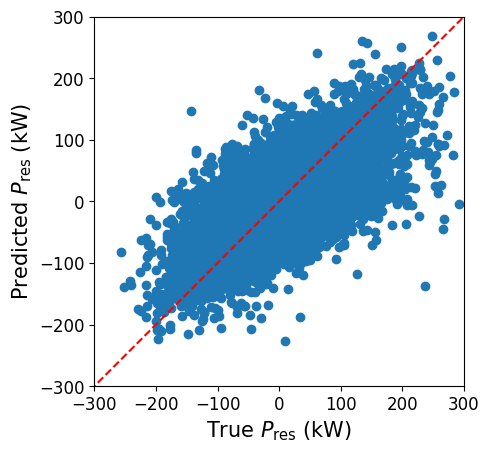


Test MAE: 10640.056085331578
Test RMSE: 22210.333383900685
Test MAPE: 61.60395255468474 %
Test R2: 0.4721904690959289


In [34]:
# Evaluate P_res with original units

# Pred vs True values

y_pred = model.predict(test_features[column_list[:]]).flatten()
y_true = test_labels

y_pred = y_pred * dataset['P_res'].std() + dataset['P_res'].mean()
y_true = y_true * dataset['P_res'].std() + dataset['P_res'].mean()

print(np.min(y_true))
print(np.max(y_true))
print(np.mean(y_true))
print(np.mean(abs(y_true)))
print()

a = plt.axes(aspect='equal')
p1 = max(max(y_pred), max(y_true))
p2 = min(min(y_pred), min(y_true))
plt.plot([p1/1000, p2/1000], [p1/1000, p2/1000], 'r--')
plt.scatter(y_true/1000, y_pred/1000)
plt.xlabel('True $P_\\text{res}$ (kW)',fontsize=15)
plt.ylabel('Predicted $P_\\text{res}$ (kW)',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
lims = [-300000/1000, 300000/1000]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)
plt.show()

P_cutoff = 25000
y_pred_nonzero = y_pred[abs(y_true)>P_cutoff]
y_true_nonzero = y_true[abs(y_true)>P_cutoff]

test_mae = mean_absolute_error(y_true,y_pred)
test_rmse = mean_squared_error(y_true,y_pred,squared=False)
#test_mape = mean_absolute_percentage_error(y_true,y_pred)*100
test_mape = mean_absolute_percentage_error(y_true_nonzero,y_pred_nonzero)*100
test_r2 = r2_score(y_true,y_pred)

print()
print("Test MAE: "+str(test_mae))
print("Test RMSE: "+str(test_rmse))
print("Test MAPE: "+str(test_mape)+" %")
print("Test R2: "+str(test_r2))

3767/3767 [==============================] - 1s 342us/step


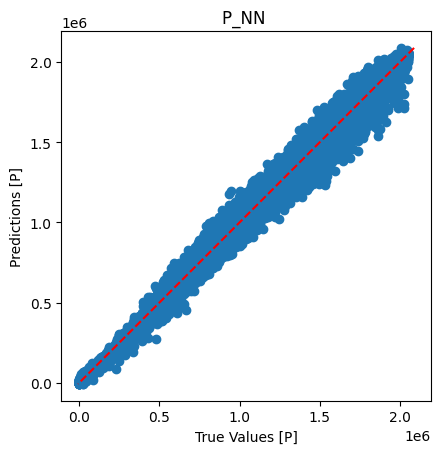


Test MAE: 11971.560812906979
Test RMSE: 25043.308631951826
Test MAPE: 2.3529151454781494 %
Test R2: 0.9968757092932147


/home/alfonso/Work/UGR/Calculations/WindTurbines_hybrid/WT_hybrid_venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
# Compare with P data with P_pred = P_phys + P_res 

# Calculate P_phys in original units
y_pred = model.predict(test_features[column_list[:]]).flatten()
y_true = test_labels

y_pred = y_pred * dataset['P'].std() + dataset['P'].mean()
y_true = y_true * dataset['P'].std() + dataset['P'].mean()

# Plot
a = plt.axes(aspect='equal')
p1 = max(max(y_pred), max(y_true))
p2 = min(min(y_pred), min(y_true))
plt.plot([p1, p2], [p1, p2], 'r--')
plt.scatter(y_true, y_pred)
plt.xlabel('True Values [P]')
plt.ylabel('Predictions [P]')
plt.title('P_NN ')
plt.show()
#lims = [0, 50]
#plt.xlim(lims)
#plt.ylim(lims)
#_ = plt.plot(lims, lims)

# Metrics
P_cutoff = 25000
y_pred_nonzero = y_pred[abs(y_true)>P_cutoff]
y_true_nonzero = y_true[abs(y_true)>P_cutoff]

test_mae = mean_absolute_error(y_true,y_pred)
test_rmse = mean_squared_error(y_true,y_pred,squared=False)
#test_mape = mean_absolute_percentage_error(y_true,y_pred)*100
test_mape = mean_absolute_percentage_error(y_true_nonzero,y_pred_nonzero)*100
test_r2 = r2_score(y_true,y_pred)

print()
print("Test MAE: "+str(test_mae))
print("Test RMSE: "+str(test_rmse))
print("Test MAPE: "+str(test_mape)+" %")
print("Test R2: "+str(test_r2))